### Project
'''
Heart rate, blood sugar level, triglyceride level, and cholesterol level are considered the indicators of heart disease. The given dataset (3-class data) contains the values of these features for each subject. Each subject belongs to one of three classes (normal, borderline, high risk of heart disease). Your task is to classify the subjects according to their given class.

Classify the data into three classes using

1. SVM

2. NN

3. Random Forest

4. Also, apply the feature selection technique (information gain and/or t-test) to identify the best feature and classify it using SVM alone.

Display results in terms of graphs, confusion matrix, and heat maps (search it).

'''

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
from io import StringIO

# Provided data
data_str = """
Class	Heart Rate	Cholestrol Level	Triglycerides Level	Fasting Blood Sugar
Nromal	61	126	78	96
Nromal	63	125	121	102
Nromal	53	111	136	98
Nromal	57	117	105	102
Nromal	70	100	77	98
Nromal	51	140	92	105
Nromal	73	106	83	97
Nromal	68	104	93	116
Nromal	62	115	107	85
Nromal	64	108	114	81
Nromal	56	120	108	81
Nromal	62	113	144	79
Nromal	74	139	114	93
Nromal	64	137	150	94
Nromal	63	102	124	91
Nromal	56	130	151	107
Nromal	62	111	90	102
Nromal	65	117	127	107
Nromal	67	122	94	114
Nromal	60	138	127	115
Nromal	59	117	129	84
Nromal	74	140	75	82
Nromal	51	112	91	104
Nromal	72	128	89	80
Nromal	72	127	126	98
Nromal	70	122	141	98
Nromal	53	128	99	111
Nromal	57	127	136	96
Nromal	59	107	127	92
Nromal	67	105	70	103
Borderline	64	172	192	127
Borderline	82	127	171	117
Borderline	63	119	222	109
Borderline	80	148	134	100
Borderline	75	166	178	120
Borderline	84	154	175	105
Borderline	82	128	178	96
Borderline	88	138	208	127
Borderline	87	143	165	104
Borderline	70	171	210	113
Borderline	81	126	179	124
Borderline	66	165	137	110
Borderline	60	153	151	127
Borderline	83	138	204	111
Borderline	75	128	179	124
Borderline	74	141	148	125
Borderline	88	144	167	113
Borderline	78	124	192	94
Borderline	79	150	152	108
Borderline	86	130	205	113
Borderline	84	139	157	106
Borderline	77	150	222	102
Borderline	65	131	160	130
Borderline	67	133	208	113
Borderline	87	151	152	133
Borderline	60	132	161	111
Borderline	75	163	142	128
Borderline	65	172	189	111
Borderline	90	158	200	130
Borderline	82	136	187	127
High Risk	82	175	318	149
High Risk	81	157	388	135
High Risk	69	187	389	183
High Risk	87	186	399	196
High Risk	69	184	385	145
High Risk	70	163	483	173
High Risk	83	175	250	154
High Risk	70	154	408	187
High Risk	91	169	258	181
High Risk	91	165	221	131
High Risk	88	159	376	189
High Risk	72	160	326	200
High Risk	87	169	329	160
High Risk	83	157	393	191
High Risk	96	176	428	166
High Risk	86	171	295	130
High Risk	91	179	393	134
High Risk	81	179	315	151
High Risk	80	177	450	180
High Risk	91	155	448	186
High Risk	70	156	265	183
High Risk	71	165	378	144
High Risk	73	173	368	162
High Risk	79	178	355	125
High Risk	92	169	459	127
High Risk	91	184	267	129
High Risk	69	180	284	174
High Risk	79	189	221	159
High Risk	83	173	481	133
High Risk	80	166	388	159


"""

# Create DataFrame
df = pd.read_csv(StringIO(data_str), delimiter='\t')

# Display the DataFrame
print(df)


        Class  Heart Rate  Cholestrol Level  Triglycerides Level  \
0      Nromal          61               126                   78   
1      Nromal          63               125                  121   
2      Nromal          53               111                  136   
3      Nromal          57               117                  105   
4      Nromal          70               100                   77   
..        ...         ...               ...                  ...   
85  High Risk          91               184                  267   
86  High Risk          69               180                  284   
87  High Risk          79               189                  221   
88  High Risk          83               173                  481   
89  High Risk          80               166                  388   

    Fasting Blood Sugar  
0                    96  
1                   102  
2                    98  
3                   102  
4                    98  
..                  ...  
8

In [ ]:
df.head()

,Class,Heart Rate,Cholestrol Level,Triglycerides Level,Fasting Blood Sugar
0,Nromal,61,126,78,96
1,Nromal,63,125,121,102
2,Nromal,53,111,136,98
3,Nromal,57,117,105,102
4,Nromal,70,100,77,98


In [ ]:
target_mapping = {"Nromal": 0, "Borderline": 1, "High Risk": 2}  # Replace with your actual categories

df['Class']= df['Class'].map(target_mapping)


In [ ]:
df['Class']

0     0
1     0
2     0
3     0
4     0
     ..
85    2
86    2
87    2
88    2
89    2
Name: Class, Length: 90, dtype: int64

In [ ]:
X = df.drop('Class', axis = 1)
y  = df['Class']

In [ ]:
print(y.unique())

[0 1 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [ ]:
len(X_train), len(y_train)

(72, 72)

###SVM

In [ ]:
# Create SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9444444444444444


### Random Forest

In [ ]:
# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8888888888888888


### Neural Network

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple NN model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate accuracy on test set
nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Neural Network Accuracy:", nn_accuracy)


Epoch 1/10
2/2 [==============================] - 1s 435ms/step - loss: 1.1320 - accuracy: 0.3333 - val_loss: 0.9405 - val_accuracy: 0.4000
Epoch 2/10
2/2 [==============================] - 0s 31ms/step - loss: 1.0757 - accuracy: 0.3509 - val_loss: 0.8955 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 0s 31ms/step - loss: 1.0195 - accuracy: 0.4561 - val_loss: 0.8529 - val_accuracy: 0.4667
Epoch 4/10
2/2 [==============================] - 0s 31ms/step - loss: 0.9711 - accuracy: 0.4912 - val_loss: 0.8138 - val_accuracy: 0.4667
Epoch 5/10
2/2 [==============================] - 0s 31ms/step - loss: 0.9212 - accuracy: 0.5088 - val_loss: 0.7771 - val_accuracy: 0.6000
Epoch 6/10
2/2 [==============================] - 0s 30ms/step - loss: 0.8772 - accuracy: 0.5965 - val_loss: 0.7434 - val_accuracy: 0.7333
Epoch 7/10
2/2 [==============================] - 0s 32ms/step - loss: 0.8367 - accuracy: 0.6140 - val_loss: 0.7119 - val_accuracy: 0.7333
Epoch 8/10
2/2 [==========

#### VISUALIZATIONS

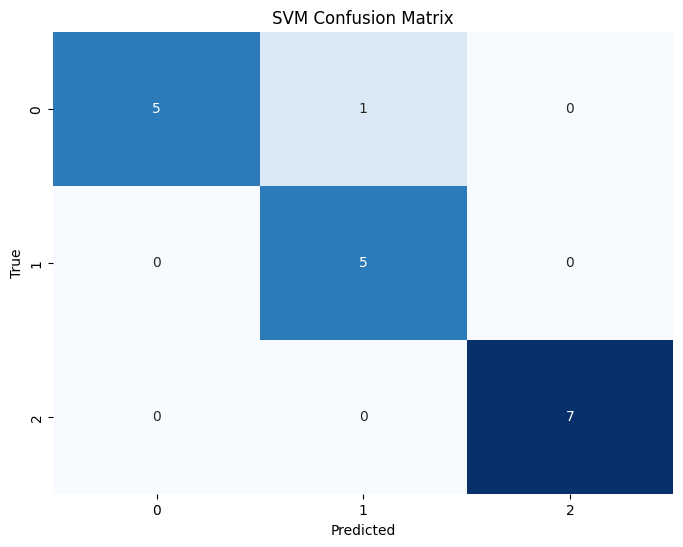

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


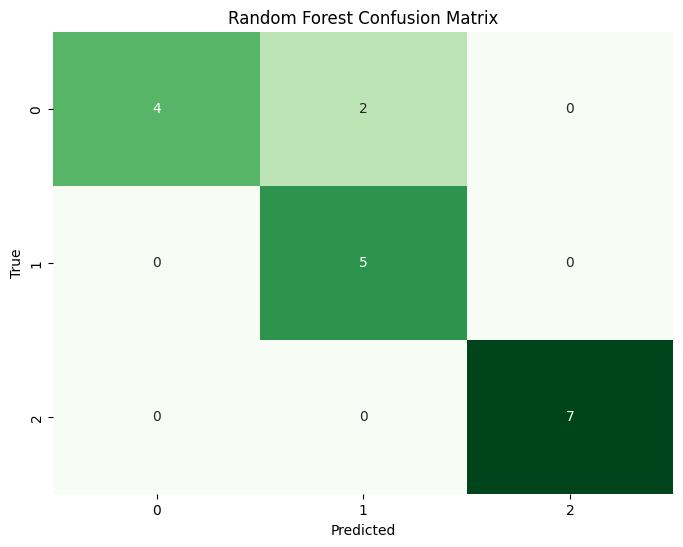

In [ ]:
# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


1/1 [==============================] - 0s 23ms/step


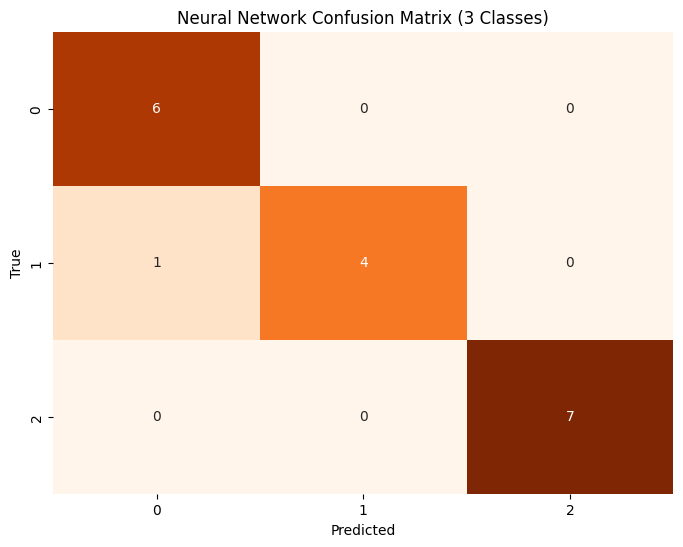

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for each class (assuming a multi-class model)
nn_probabilities = nn_model.predict(X_test_scaled)

# Get the predicted class with the highest probability for each sample
nn_predictions = np.argmax(nn_probabilities, axis=1)  # Changes here

# Confusion matrix
nn_cm = confusion_matrix(y_test, nn_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Neural Network Confusion Matrix (3 Classes)')  # Updated title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### ROC Curves

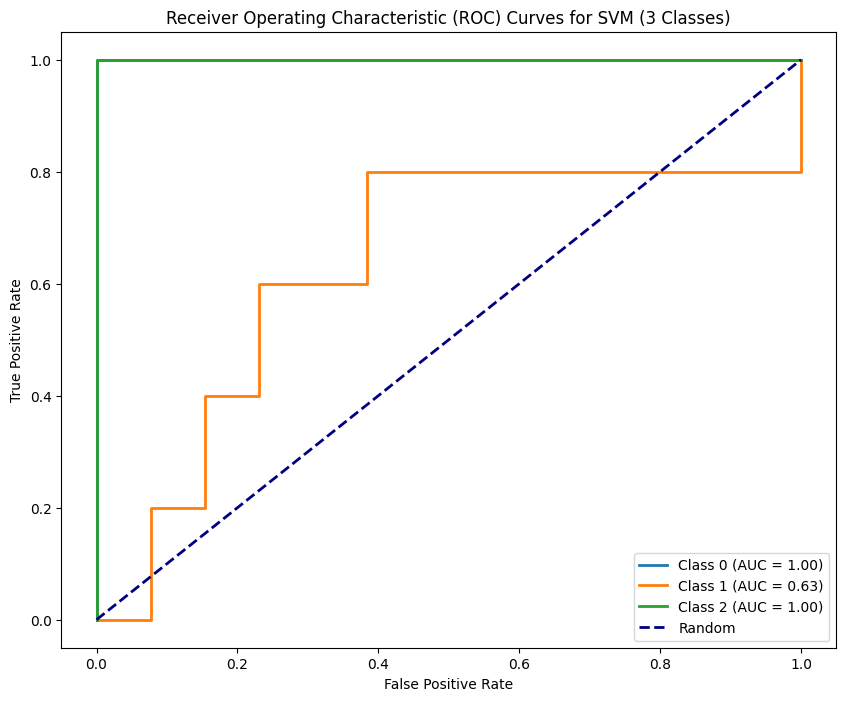

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train and X_test are your training and testing datasets

# Create multi-class SVM model using OneVsRestClassifier
svm_model = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svm_model.fit(X_train, y_train)

# Make predictions and get decision function scores
y_scores_svm = svm_model.decision_function(X_test)

# Binarize the labels for multi-class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes

# Compute ROC curves and ROC areas for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for SVM (3 Classes)')
plt.legend(loc="lower right")
plt.show()


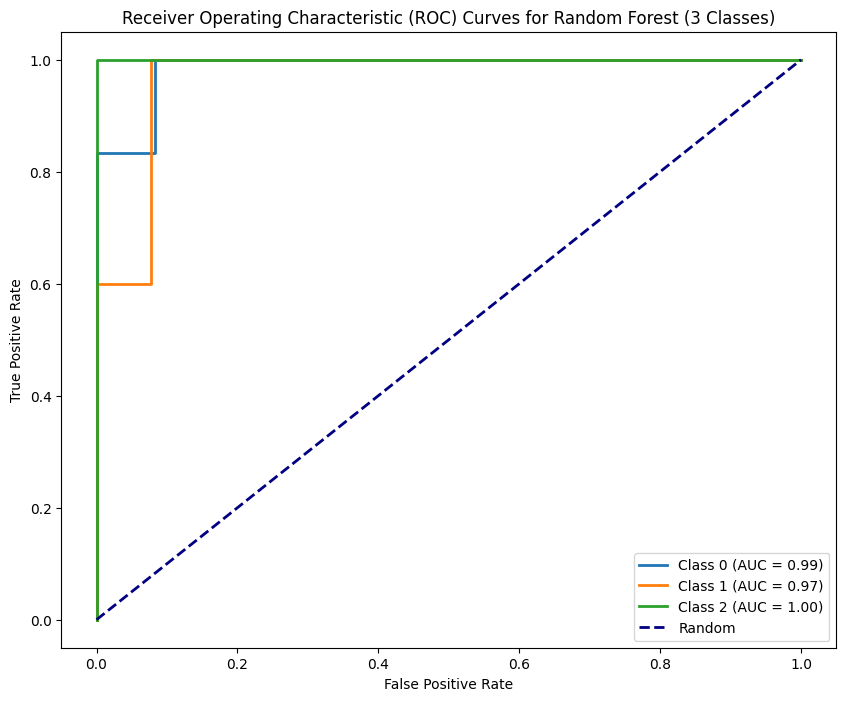

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming you have X_test, y_test, and a trained Random Forest model (rf_model)

# Make predictions and get probabilities for each class
y_probs_rf = rf_model.predict_proba(X_test)

# Binarize the labels for multi-class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes

# Compute ROC curves and ROC areas for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Random Forest (3 Classes)')
plt.legend(loc="lower right")
plt.show()


<Axes: >

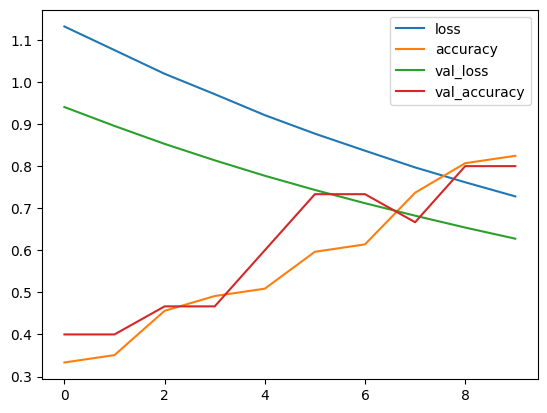

In [ ]:
# For Neural network we will plot accuracy vs epoch curve

pd.DataFrame(history.history).plot()

#### Using IG to get the best features and do classificaion using SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest

# Feature selection using Information Gain
k_best = SelectKBest(score_func=mutual_info_classif, k=2)  # You can adjust the 'k' parameter
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

selected_features_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print("Selected Features:", selected_features)

# Train SVM on the selected features
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: Index(['Triglycerides Level', 'Fasting Blood Sugar'], dtype='object')
Accuracy: 0.8888888888888888


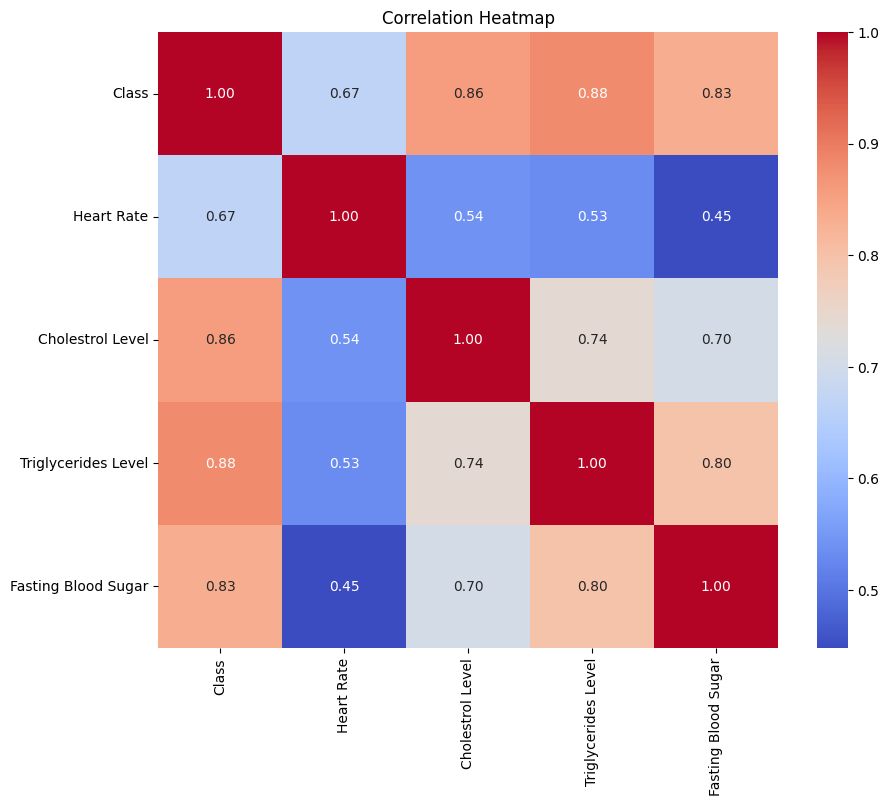

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame called 'data'
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

